In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### 데이터셋 불러오기

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### 이미지 라벨 설명
0 : T-shirt/top  
1 : Trouser  
2 : Pullover  
3 : Dress  
4 : Coat  
5 : Sandal  
6 : Shirt  
7 : Sneaker  
8 : Bag  
9 : Ankel boot  

In [4]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

0번 클래스 의류


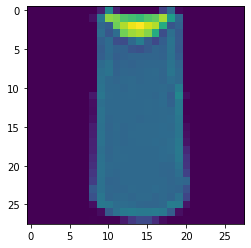

In [11]:
image = train_images[2,:].reshape(28,28)
print(f'{int(train_labels[2])}번 클래스 의류')
plt.imshow(image)
plt.show()

### 이미지 형태 확인

In [12]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 데이터 전처리

In [13]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## 모델링

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape

In [19]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(128, 5, activation='relu',padding="same"))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 5, activation='relu',padding="same"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/5
60000/60000 [==============================] - 206s 3ms/sample - loss: 0.3819 - acc: 0.8622
Epoch 2/5
60000/60000 [==============================] - 209s 3ms/sample - loss: 0.2692 - acc: 0.8994
Epoch 3/5
60000/60000 [==============================] - 207s 3ms/sample - loss: 0.2309 - acc: 0.9152
Epoch 4/5
60000/60000 [==============================] - 206s 3ms/sample - loss: 0.2035 - acc: 0.9257
Epoch 5/5
60000/60000 [==============================] - 208s 3ms/sample - loss: 0.1808 - acc: 0.9324
10000/10000 - 7s - loss: 0.2654 - acc: 0.9104


[0.26536102355122565, 0.9104]

[4.6926181e-04 5.9606986e-09 3.2920684e-03 1.8742986e-04 5.3166267e-02
 3.8545551e-07 9.4278568e-01 4.4729703e-07 9.8012410e-05 4.5717741e-07]
예측 : 6번 클래스 의류
정답 : 6번 클래스 의류


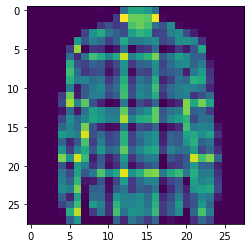

In [34]:
count = 7
predictions = model.predict(test_images)
print(predictions[count])
print('예측 : ', np.argmax(predictions[count]), '번 클래스 의류', sep="")
image = test_images[count,:].reshape(28,28)
print('정답 : ', f'{int(test_labels[count])}번 클래스 의류', sep="")
plt.imshow(image)
plt.show()